In [3]:
import pandas as pd
from src.optimal_binning import OptimalBinning

In [4]:
df = pd.read_csv('C:/Users/ruben/Downloads/breast-cancer.csv')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [5]:
binner = OptimalBinning(
    min_bins=2, max_bins=10, min_samples_bin=0.05, monotonic_trend='ascending', p_value_threshold=0.05, variable_type="continuous"
)
binner.fit(df['area_mean'], df['diagnosis'])
binner.get_binning_table()

Bin  Count  Non-event  Event  \
0               [-inf, 473.59999084472656)    205        199      6   
1  [473.59999084472656, 529.8000183105469)     61         54      7   
2              [529.8000183105469, 696.25)    131         94     37   
3                         [696.25, 883.25)     52          9     43   
4                            [883.25, inf)    120          1    119   
5                                    Total    569        357    212   

   Event rate       WoE        IV  IV_percentage  
0    0.029268  2.980396  1.576990          30.78  
1    0.114754  1.521924  0.179955           3.51  
2    0.282443  0.411227  0.036508           0.71  
3    0.826923 -2.085125  0.370360           7.23  
4    0.991667 -5.300273  2.960307          57.77  
5    0.372583            5.124119         100.00

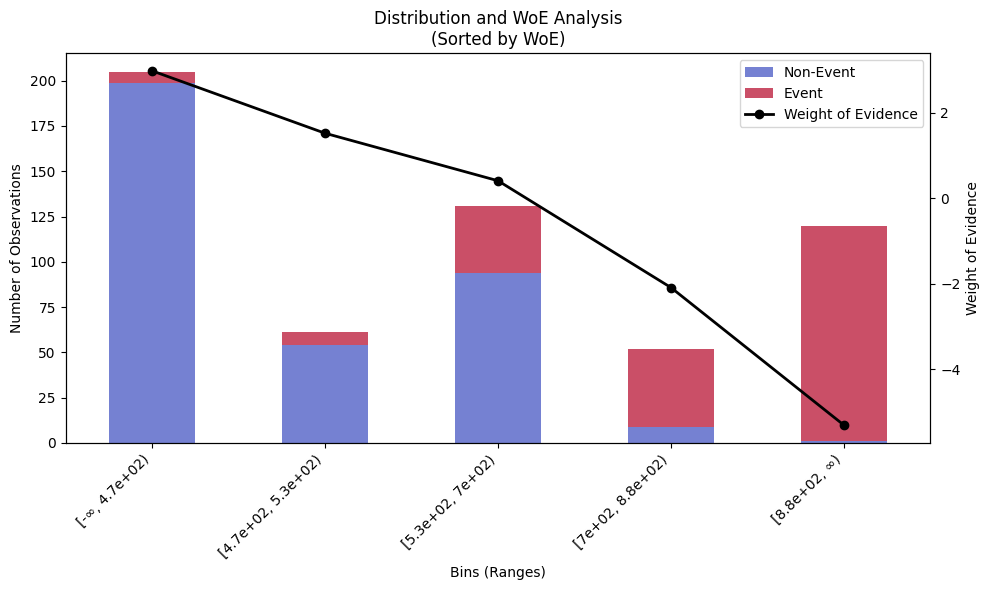

In [6]:
binner.plot_binning()

In [8]:
import optbinning

optb = optbinning.OptimalBinning(name="Radius Mean", dtype="numerical", solver="cp", monotonic_trend='ascending')
optb.fit(df['area_mean'], df['diagnosis'])
optb._binning_table.build()

Bin  Count  Count (%)  Non-event  Event  Event rate  \
0         (-inf, 390.60)    107   0.188049        104      3    0.028037   
1       [390.60, 440.80)     59   0.103691         56      3    0.050847   
2       [440.80, 529.80)    100   0.175747         93      7    0.070000   
3       [529.80, 576.70)     46   0.080844         37      9    0.195652   
4       [576.70, 696.25)     85   0.149385         57     28    0.329412   
5       [696.25, 883.25)     52   0.091388          9     43    0.826923   
6          [883.25, inf)    120   0.210896          1    119    0.991667   
7                Special      0   0.000000          0      0    0.000000   
8                Missing      0   0.000000          0      0    0.000000   
Totals                      569   1.000000        357    212    0.372583   

             WoE        IV        JS  
0       3.024629  0.838323  0.077222  
1        2.40559  0.343306  0.034863  
2        2.06554  0.469880  0.050112  
3       0.892544  0.054614  0.006609  
4       0.189697  0.005233  0.000653  
5      -2.085125  0.370360  0.039392  
6      -5.300273  2.960307  0.186682  
7            0.0  0.000000  0.000000  
8            0.0  0.000000  0.000000  
Totals            5.042023  0.395533

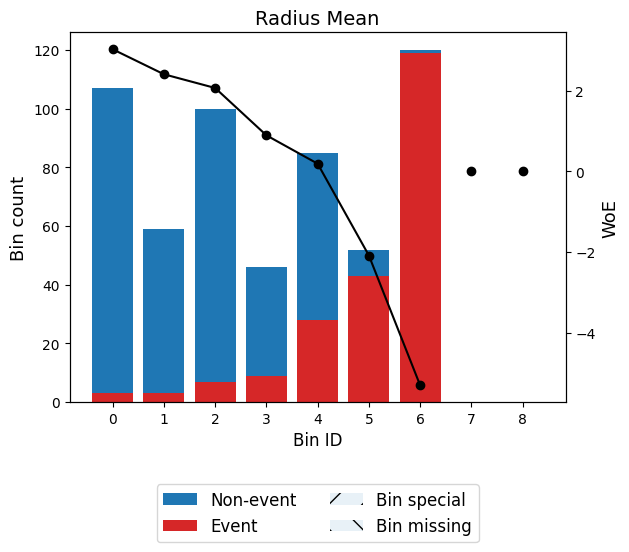

In [9]:
optb.binning_table.plot(metric="woe")